# Boston Crime Data Analysis
This project is based on Boston Crime data between 2021-current date downloaded from [this link](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)

Please answer the following ten questions and visualize each result. Please label each question clearly.

1. display number of crime by year, order by year
2. display number of crime by year and month in the format of year-month, order by year_month.
3. display average crime by month between 2021 and 2025. Visualize your result.
4. display average, min and max crime by month between 2021 and 2025
5. what time of the day has the highest crime
6. display number of crimes by weekday and the time of the day
7. display top 5 district based on number of crimes
8. for each top 5 districts, display top 5 types of crimes (offense_description) based on number of crimes
9. Display percent of shooting by year.
10. Which offenses likely lead to shooting. Show top 5 offense by year.

**Note for the visulaiztion:**

- Select the appropriate chart type for each question to enhance clarity and understanding.
- Use an effective and consistent color scheme to make charts easy to interpret.
- Ensure that the chosen chart type emphasizes key insights without overwhelming or confusing the audience.


In addtion, there are many interesting questions you can explore using this dataset. Please come up at least five questions and develop Pyspark code to answer your questions and visualze the result. Please write a few paragraphs at the end to summarize your findings. Your summary should include the above 10 questions and your own questions. Your own questions cannot be an existing question at the above and need to meaningful. You may want to start with developing an objective before developing your questions.

## Note: Please using Pyspark to answer question, not python code.

## Import dataset

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from helper_functions import displayByGroup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# create a spark session
spark = SparkSession.builder.appName("Boston Crime Analysis")\
        .config("spark.port.maxRetries", "100")\
        .getOrCreate()

# confiture the log level (defaulty is WWARN)
spark.sparkContext.setLogLevel('ERROR')

# read the csv file, remove year with null value and remove current month (Septmber 2025)
crime = spark.read.csv("/opt/shared/boston_crime", header=True, inferSchema=True).filter(F.isnull(F.col('year'))==False)\
       .filter(F.date_format(F.col('occurred_on_date'), 'yyyy-MM')!='2025-09')

# change all columns to lower case

crime=crime.toDF(*[x.lower() for x in crime.columns])

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/06 13:50:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
25/10/06 13:50:33 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.
25/10/06 13:50:33 WARN Utils: Serv

In [2]:
crime.groupBy('year').count().show()

+----+-----+
|year|count|
+----+-----+
|2025|53213|
|2023|78012|
|2024|79045|
|2022|73852|
|2021|71721|
|2020|70894|
+----+-----+



In [3]:
crime.printSchema()

root
 |-- incident_number: string (nullable = true)
 |-- offense_code: string (nullable = true)
 |-- offense_code_group: string (nullable = true)
 |-- offense_description: string (nullable = true)
 |-- district: string (nullable = true)
 |-- reporting_area: string (nullable = true)
 |-- shooting: integer (nullable = true)
 |-- occurred_on_date: timestamp (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ucr_part: string (nullable = true)
 |-- street: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- location: string (nullable = true)



In [4]:
displayByGroup(crime, 5)

+---------------+------------+------------------+--------------------+--------+--------------+
|incident_number|offense_code|offense_code_group|offense_description |district|reporting_area|
+---------------+------------+------------------+--------------------+--------+--------------+
|232007173      |3115        |NULL              |INVESTIGATE PERSON  |B3      |              |
|232004454      |3301        |NULL              |VERBAL DISPUTE      |B2      |316           |
|232006290      |3115        |NULL              |INVESTIGATE PERSON  |A1      |              |
|232024939      |3114        |NULL              |INVESTIGATE PROPERTY|B3      |              |
|232006708      |423         |NULL              |ASSAULT - AGGRAVATED|B2      |              |
+---------------+------------+------------------+--------------------+--------+--------------+
only showing top 5 rows

+--------+-------------------+----+-----+-----------+----+
|shooting|occurred_on_date   |year|month|day_of_week|hour|
+-

## Example

## Display top five offense

In [5]:
crime.groupBy('offense_description').count().orderBy(F.desc('count')).limit(5).show()

+--------------------+-----+
| offense_description|count|
+--------------------+-----+
|  INVESTIGATE PERSON|40761|
|         SICK ASSIST|32995|
|M/V - LEAVING SCE...|25225|
|INVESTIGATE PROPERTY|19590|
| TOWED MOTOR VEHICLE|18115|
+--------------------+-----+



### Visualize the result

In [6]:
# convert the result to pandas dataframe

pd_df=crime.groupBy('offense_description').count().orderBy(F.desc('count')).limit(5).toPandas()

pd_df.head()

,offense_description,count
0,INVESTIGATE PERSON,40761
1,SICK ASSIST,32995
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,25225
3,INVESTIGATE PROPERTY,19590
4,TOWED MOTOR VEHICLE,18115


<Axes: xlabel='count', ylabel='offense_description'>

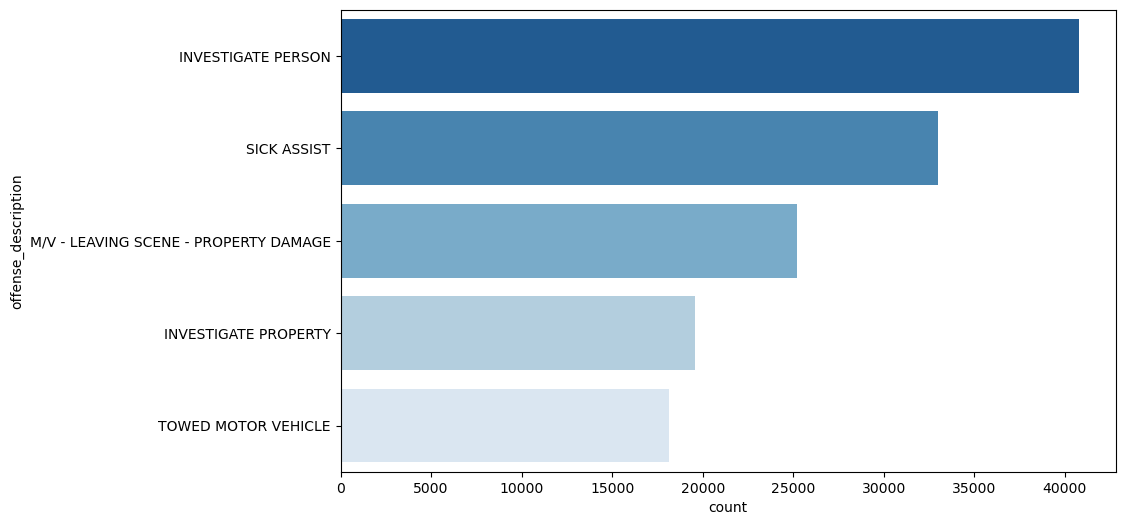

In [7]:
# set the fiture size
plt.figure(figsize=(10,6))

sns.barplot(data=pd_df, y='offense_description',x="count", orient='h', palette='Blues_r')

## Put your solutions in the following section

In [8]:
crime.columns

['incident_number',
 'offense_code',
 'offense_code_group',
 'offense_description',
 'district',
 'reporting_area',
 'shooting',
 'occurred_on_date',
 'year',
 'month',
 'day_of_week',
 'hour',
 'ucr_part',
 'street',
 'lat',
 'long',
 'location']

In [9]:
from pyspark.sql.functions import col, to_timestamp, year, month, date_format

#I researched the styles for the graphs: https://seaborn.pydata.org/tutorial/color_palettes.html

crime = crime.withColumn("datetime", to_timestamp(col("occurred_on_date")))
crime = crime.withColumn('year_month', date_format(col('datetime'), 'yyyy-MM'))

In [10]:
crime.show()

+---------------+------------+------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+--------------------+------------------+------------------+--------------------+-------------------+----------+
|incident_number|offense_code|offense_code_group| offense_description|district|reporting_area|shooting|   occurred_on_date|year|month|day_of_week|hour|ucr_part|              street|               lat|              long|            location|           datetime|year_month|
+---------------+------------+------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+--------------------+------------------+------------------+--------------------+-------------------+----------+
|      232007173|        3115|              NULL|  INVESTIGATE PERSON|      B3|              |       0|2023-01-27 14:44:00|2023|    1|  Friday   |  22|    NULL|            FAVRE ST|42.

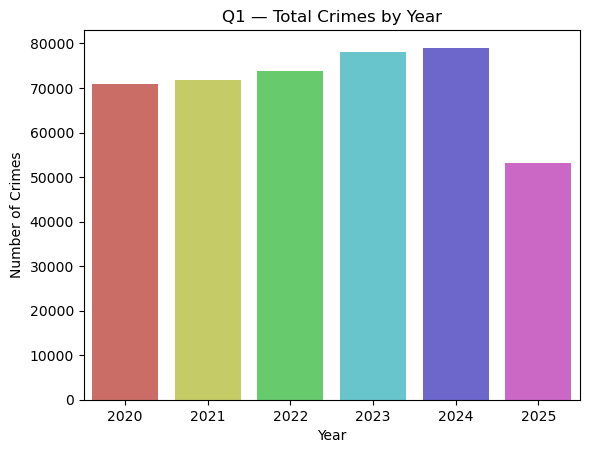

In [11]:
#1. display number of crime by year, order by year

q1 = crime.groupBy("year").agg(F.count("*").alias("total_crimes")).orderBy("year")
q1_pd = q1.toPandas()

# Plot
plt.figure()
sns.barplot(data=q1_pd, x="year", y="total_crimes", palette='hls') #rainbow palette throughout for consistency 
plt.title("Q1 — Total Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


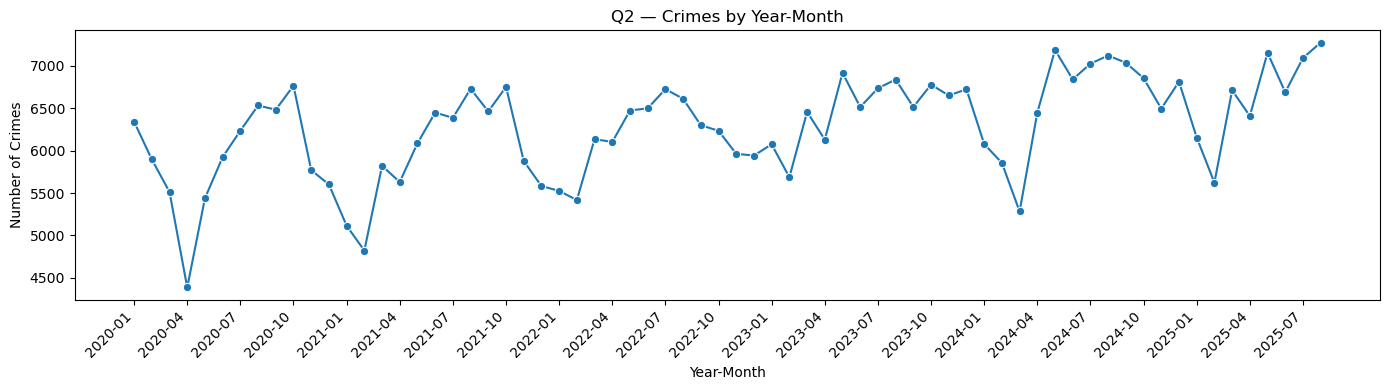

In [12]:
#2. display number of crime by year and month in the format of year-month, order by year_month.
q2 = crime.groupBy("year_month").agg(F.count("*").alias("total_crimes")).orderBy("year_month")
q2_pd = q2.toPandas()

# line chart to show trend
plt.figure(figsize=(14,4))
sns.lineplot(data=q2_pd, x="year_month", y="total_crimes", marker="o")
plt.xticks(rotation=45)
plt.xticks(q2_pd["year_month"][::3], rotation=45, ha='right') #only shows every 3 months to be less crowded
plt.title("Q2 — Crimes by Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


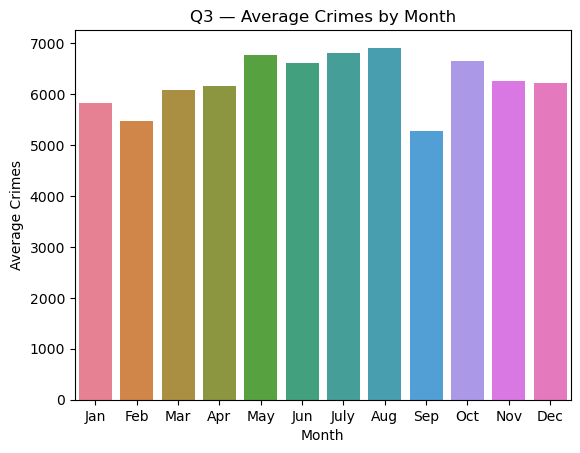

In [30]:
#3. display average crime by month between 2021 and 2025. Visualize your result.
q3 = crime.filter((col("year") >= 2021) & (col("year") <= 2025)) \
              .groupBy("year","month").agg(F.count("*").alias("monthly_count"))

q3_final = q3.groupBy("month").agg(F.avg("monthly_count").alias("avg_crimes")).orderBy("month")
q3_pd = q3_final.toPandas()

plt.figure()
sns.barplot(data=q3_pd, x="month", y="avg_crimes", palette='husl')
plt.title("Q3 — Average Crimes by Month")
plt.xlabel("Month")
plt.xticks(ticks=range(12), #changing the x labels to be the names of the months, not numbers 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel("Average Crimes")
plt.show()


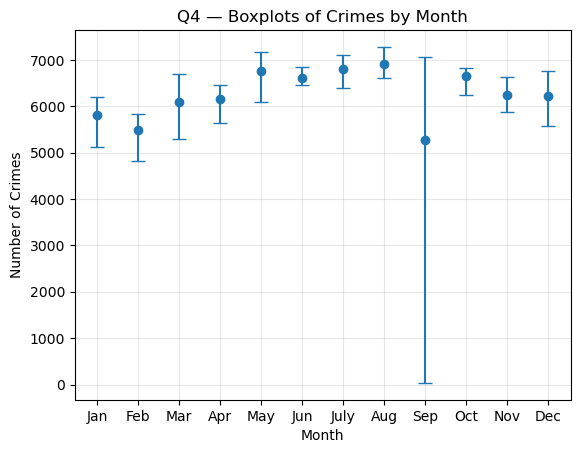

In [60]:
#4. display average, min and max crime by month between 2021 and 2025
q4 = q3.groupBy("month").agg( #using the previous question's setup because it has filtered the dates
    F.round(F.avg("monthly_count"),2).alias("avg_crimes"),
    F.min("monthly_count").alias("min_crimes"),
    F.max("monthly_count").alias("max_crimes")
).orderBy("month")

q4_pd = q4.toPandas()

#boxplots to show range
plt.figure()
plt.errorbar(q4_pd['month'], q4_pd['avg_crimes'],
             yerr=[q4_pd['avg_crimes']-q4_pd['min_crimes'], q4_pd['max_crimes']-q4_pd['avg_crimes']],
             fmt='o', capsize=5)
plt.title("Q4 — Boxplots of Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(ticks=range(1, 13), #changing the x labels to be the names of the months, not numbers 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.3)
plt.show()

Q5 — Top hour: 0 with 21936 incidents


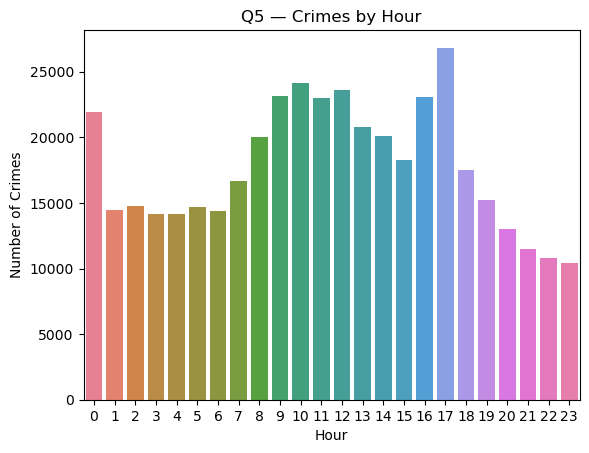

In [32]:
#5. what time of the day has the highest crime

# attempt to remove nulls or invalid entries
q5 = crime.withColumn(
    "hour",
    F.hour(F.col("occurred_on_date"))
).filter(
    F.col("hour").isNotNull()
)

# group by hour
q5_grouped = q5.groupBy("hour")\
    .agg(F.count("*").alias("count"))\
    .orderBy("hour")

pd_q5 = q5_grouped.toPandas()

top_hour = pd_q5.iloc[0]
print(f"Q5 — Top hour: {int(top_hour['hour'])} with {int(top_hour['count'])} incidents")

# Bar plot crimes by hour (0-23)
plt.figure()
sns.barplot(data=pd_q5.sort_values('hour'), x="hour", y="count", palette='husl')
plt.title("Q5 — Crimes by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()

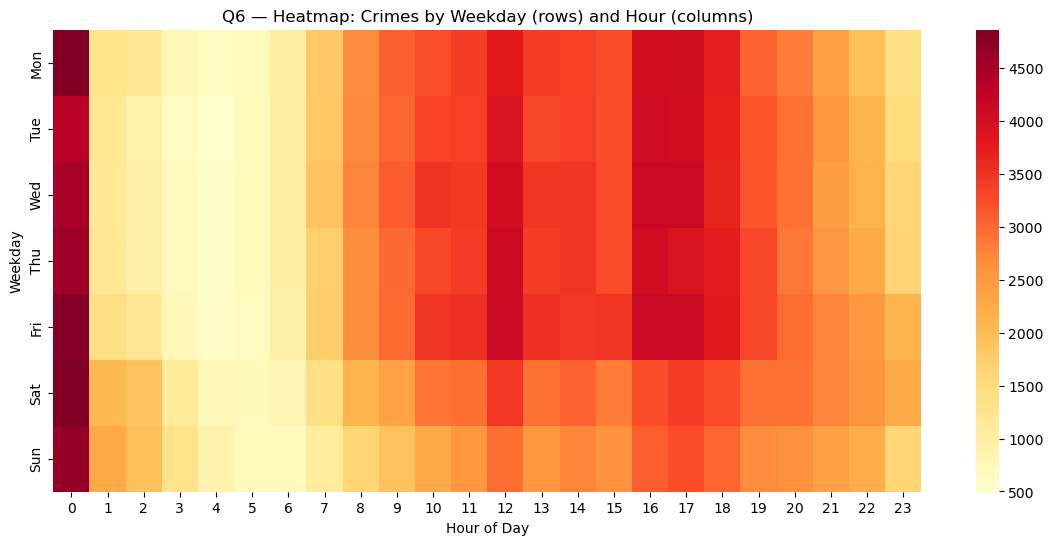

In [33]:
#6. display number of crimes by weekday and the time of the day

week_hour = crime.groupBy("day_of_week","hour").agg(F.count("*").alias("count"))

weekday_order = F.create_map(
    *sum([[F.lit(x), F.lit(i)] for i,x in enumerate(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], start=1)], [])
)

week_hour = week_hour.withColumn("wd_short", F.expr("substring(day_of_week,1,3)")) \
       .withColumn("wd_order", weekday_order[F.col("wd_short")])

pivot = week_hour.groupBy("wd_short","wd_order").pivot("hour").sum("count").orderBy("wd_order")
pivot_pd = pivot.toPandas().set_index("wd_short").drop(columns=["wd_order"]).fillna(0)

pivot_pd = pivot_pd.reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]) # ordering days from Monday to Sunday

# Heatmap
plt.figure(figsize=(14,6))
sns.heatmap(pivot_pd, cmap="YlOrRd", fmt=".0f") #changed the colors for a heatmap to look more appropriate
plt.title("Q6 — Heatmap: Crimes by Weekday (rows) and Hour (columns)")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.show()


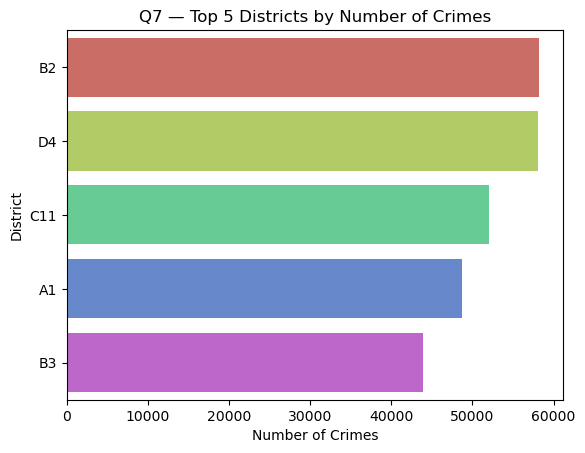

In [34]:
#7. display top 5 district based on number of crimes
top5_districts = crime.groupBy("district").agg(F.count("*").alias("count")) \
                      .filter(col("district").isNotNull()) \ # handling nulls
                      .orderBy(F.desc("count")).limit(5) #limiting to top 5
top5_pd = top5_districts.toPandas()

plt.figure()
sns.barplot(data=top5_pd, x="count", y="district", palette='hls')
plt.title("Q7 — Top 5 Districts by Number of Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("District")
plt.show()


Q8 — Top 5 Offenses for Top 5 Districts


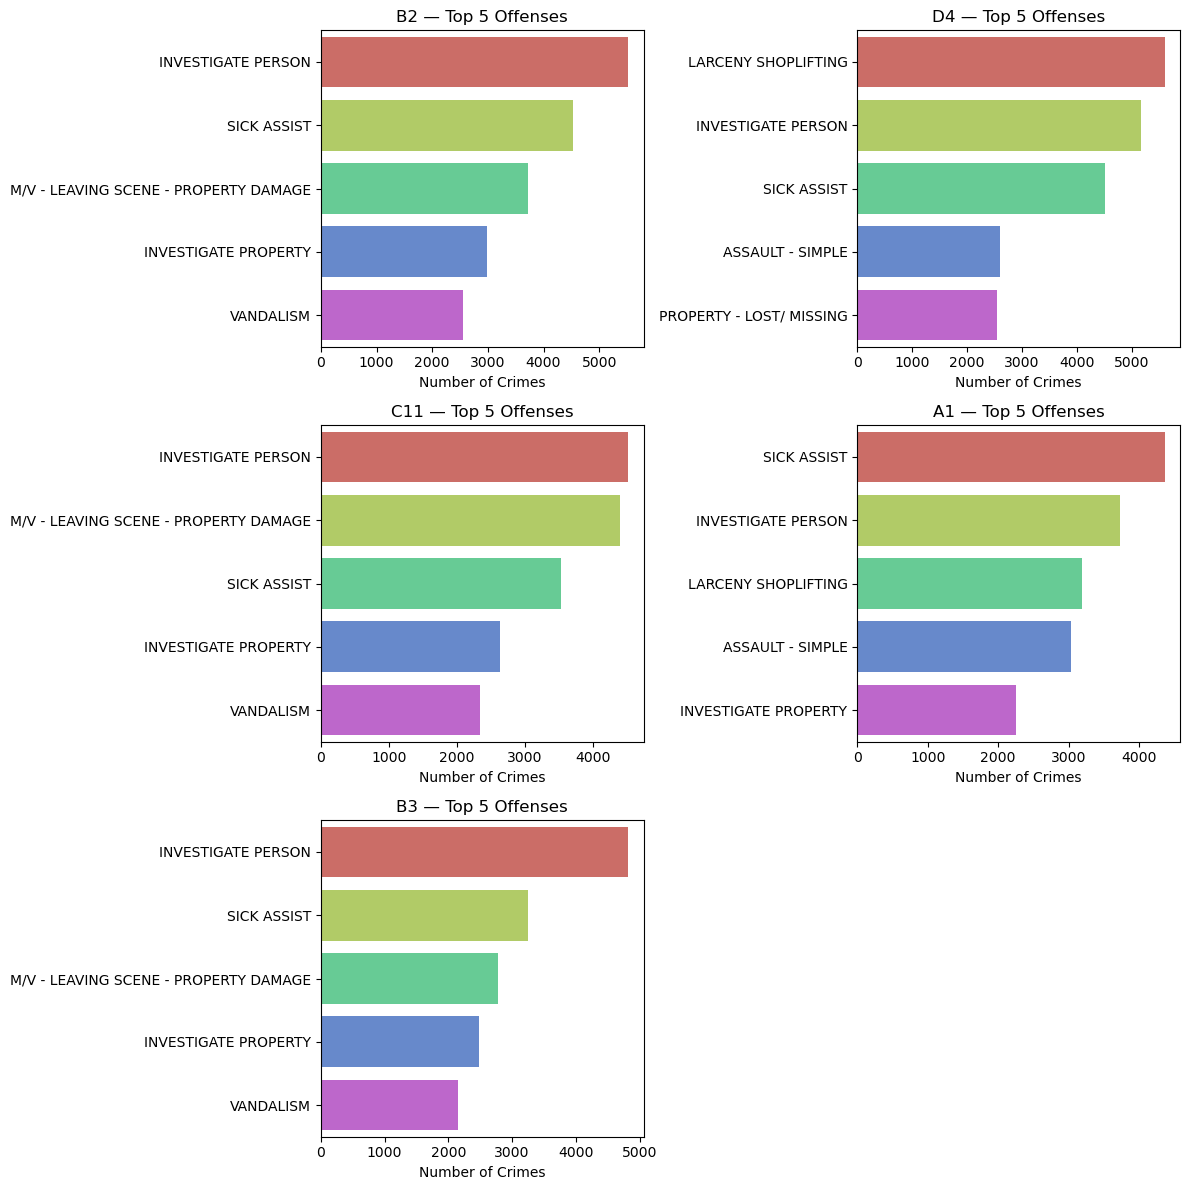

In [37]:
#8. for each top 5 districts, display top 5 types of crimes (offense_description) based on number of crimes
# top 5 districts list using the previous question
top5_list = [i['district'] for i in top5_districts.collect()] #researched how to do collect for this line 

from pyspark.sql.window import Window #you mentioned window in class, so I looked it up and 
                                    #chatgpt said use window for showing multiple graphs 

# compute top 5 offenses per district
top_offenses_by_district = (
    crime.filter(col("district").isin(top5_list))
         .groupBy("district","offense_description")
         .agg(F.count("*").alias("count"))
         .withColumn("rn", F.row_number().over(
             Window.partitionBy("district").orderBy(F.desc("count"))
         ))
         .filter(col("rn") <= 5)
         .orderBy("district", F.desc("count"))
)

tod_pd = top_offenses_by_district.select("district","offense_description","count").toPandas() 
print("Q8 — Top 5 Offenses for Top 5 Districts")

# one bar plot per district
plt.figure(figsize=(12, rows*4))
for i, d in enumerate(top5_list, start=1):
    plt.subplot(rows, cols, i)
    sub = tod_pd[tod_pd['district']==d].sort_values('count', ascending=False)
    sns.barplot(data=sub, x='count', y='offense_description', palette='hls')
    plt.title(f"{d} — Top 5 Offenses")
    plt.xlabel("Number of Crimes")
    plt.ylabel("")
plt.tight_layout()
plt.show()


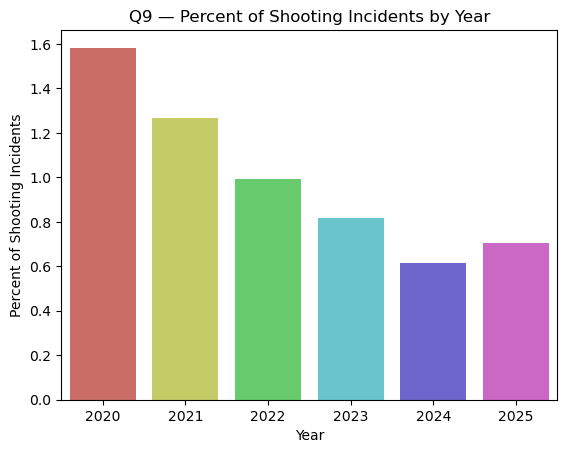

In [40]:
#9. Display percent of shooting by year.
shoot_by_year = crime.groupBy("year").agg(
    F.count("*").alias("total"),
    F.sum("shooting").alias("shootings")
).orderBy("year")

shoot_by_year = shoot_by_year.withColumn("percent_shooting", (col("shootings")/col("total")*100))
sby_pd = shoot_by_year.toPandas()

plt.figure()
sns.lineplot(data=sby_pd, x="year", y="percent_shooting", marker="o")
sns.barplot(data=sby_pd, x="year", y="percent_shooting", palette='hls')
plt.title("Q9 — Shooting Incidents by Year (%)")
plt.xlabel("Year")
plt.ylabel("Shooting Incidents (%)")
plt.show()

Q10 — Top 5 Offenses Leading to Shootings, by Year


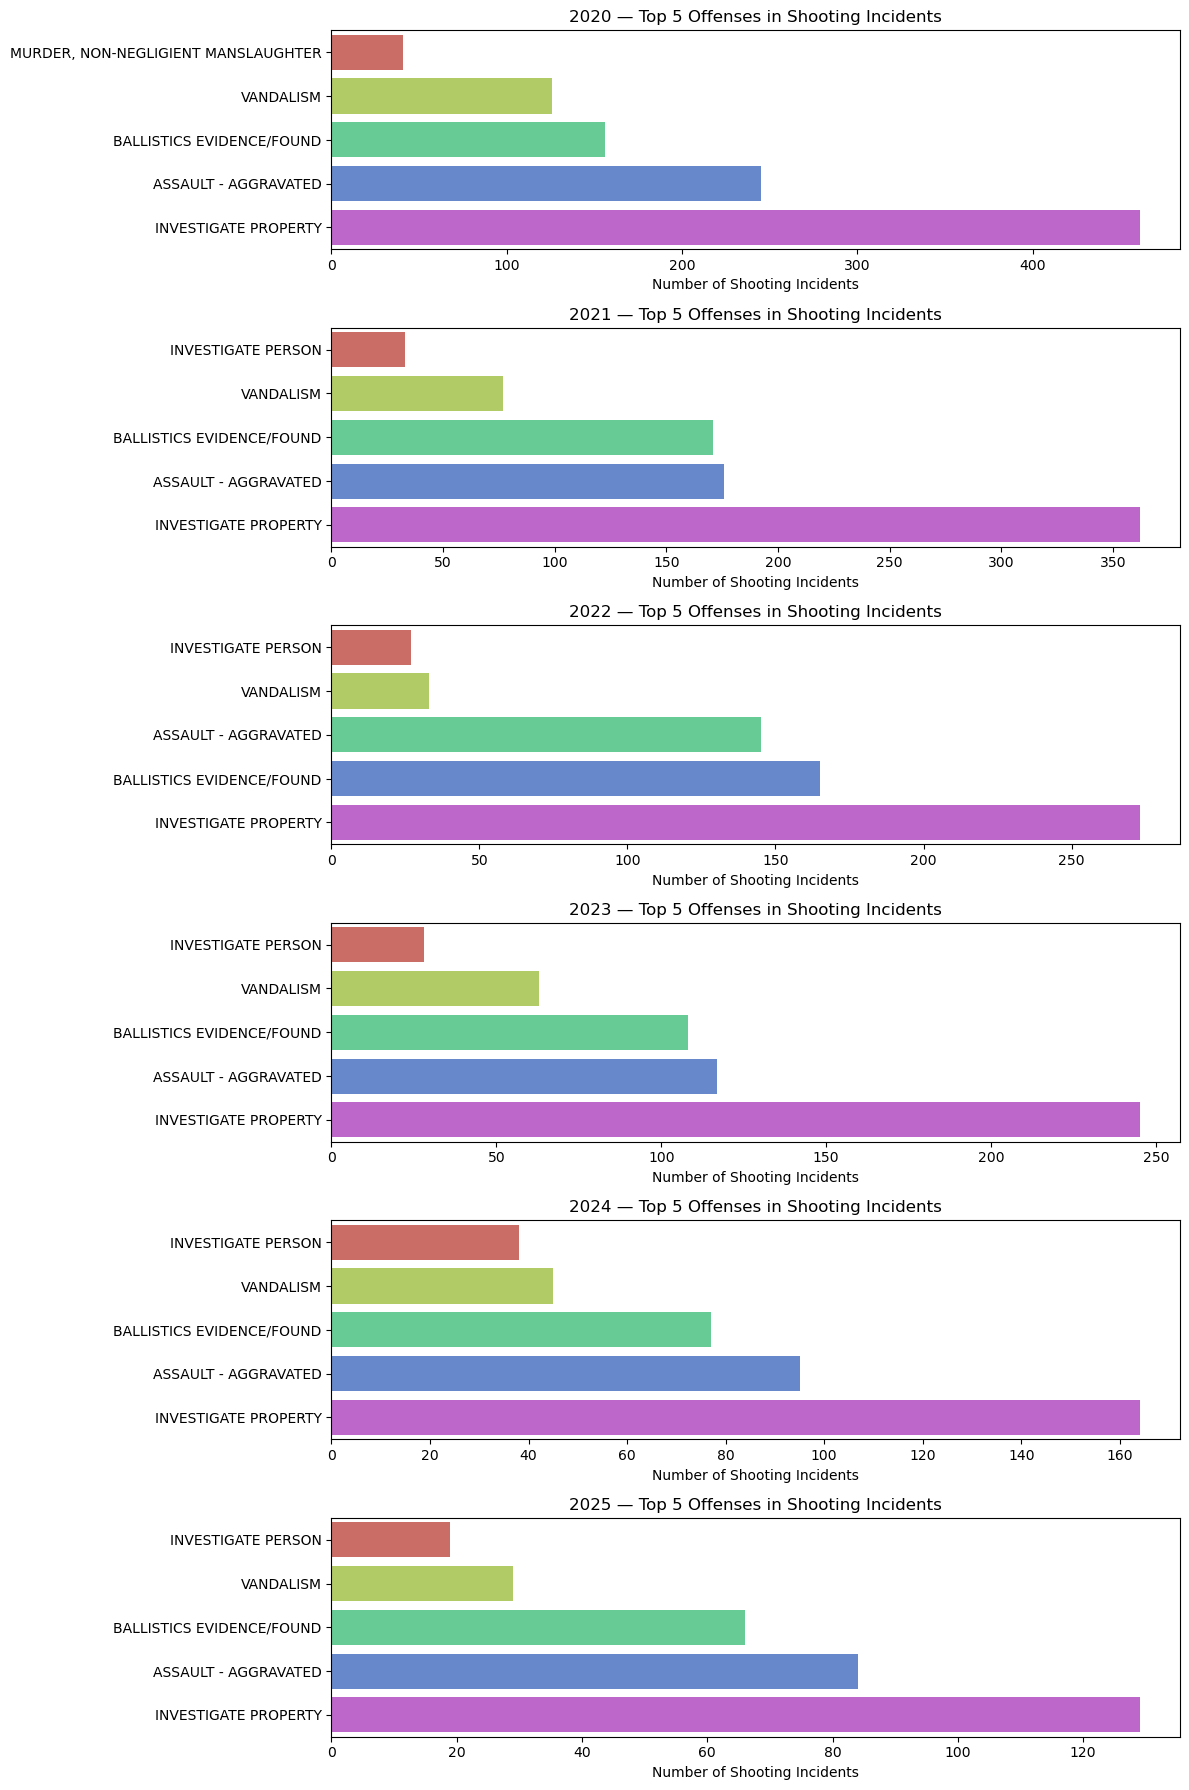

In [41]:
#10. Which offenses likely lead to shooting. Show top 5 offense by year.
shooting_offenses = crime.filter(col("shooting") == 1) \ #choosing entries that are shootings
    .groupBy("year","offense_description") \
    .agg(F.count("*").alias("shoot_count")) \
    .withColumn("rn", F.row_number().over(Window.partitionBy("year").orderBy(F.desc("shoot_count")))) \
    .filter(col("rn") <= 5) \
    .orderBy("year", F.desc("shoot_count"))

so_pd = shooting_offenses.select("year","offense_description","shoot_count").toPandas()
print("Q10 — Top 5 Offenses Leading to Shootings, by Year")

# one plot per year
years = sorted(so_pd['year'].unique())
plt.figure(figsize=(12, len(years)*3))
for i,y in enumerate(years, start=1):
    plt.subplot(len(years), 1, i)
    sub = so_pd[so_pd['year']==y].sort_values('shoot_count', ascending=True)
    sns.barplot(data=sub, x='shoot_count', y='offense_description', palette='hls')
    plt.title(f"{y} — Top 5 Offenses in Shooting Incidents")
    plt.xlabel("Number of Shooting Incidents")
    plt.ylabel("")
plt.tight_layout()
plt.show()


# New Questions

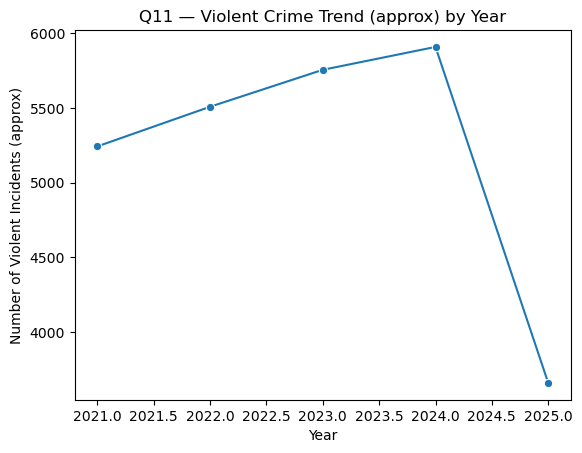

In [58]:
# Q11 — What are the trends in violent crime since 2021?
violent_keywords = ["ASSAULT","ROBBERY","HOMICIDE","HOMICIDE","MURDER","RAPE","FIREARM"]
crime = crime.withColumn("violent_flag",
    F.when(
        (F.upper(F.coalesce(col("ucr_part"), F.lit(""))).like("%PART%1%")) |
        (F.upper(F.coalesce(col("offense_description"), F.lit(""))).rlike("|".join(violent_keywords))),
        1
    ).otherwise(0)
)

violent_trend = crime.filter((col("year")>=2021)).groupBy("year").agg(
    F.sum("violent_flag").alias("violent_cnt"),
    F.count("*").alias("total")
).orderBy("year")
vt_pd = violent_trend.toPandas()

plt.figure()
sns.lineplot(data=vt_pd, x="year", y="violent_cnt", marker="o")
plt.title("Q11 — Violent Crime Trend (approx) by Year")
plt.xlabel("Year")
plt.ylabel("Number of Violent Incidents (approx)")
plt.show()


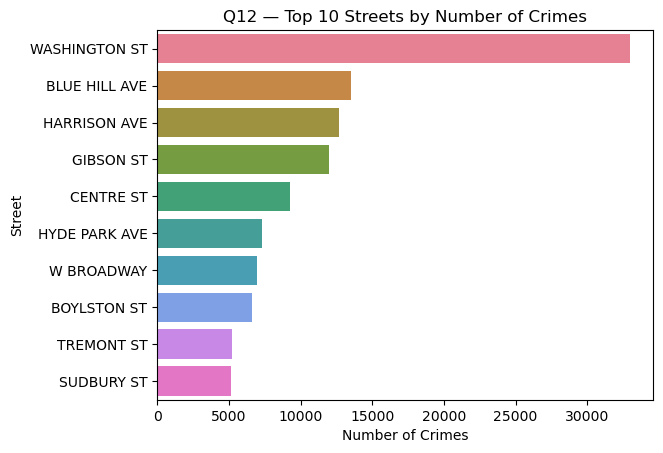

In [44]:
# Q12 — Which 10 streets have the highest crime concentration?

top_streets = crime.filter(col("street").isNotNull()) \
                   .groupBy("street").agg(F.count("*").alias("count")) \
                   .orderBy(F.desc("count")).limit(10)
ts_pd = top_streets.toPandas()
plt.figure()
sns.barplot(data=ts_pd, x='count', y='street', palette='husl')
plt.title("Q12 — Top 10 Streets by Number of Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("Street")
plt.show()


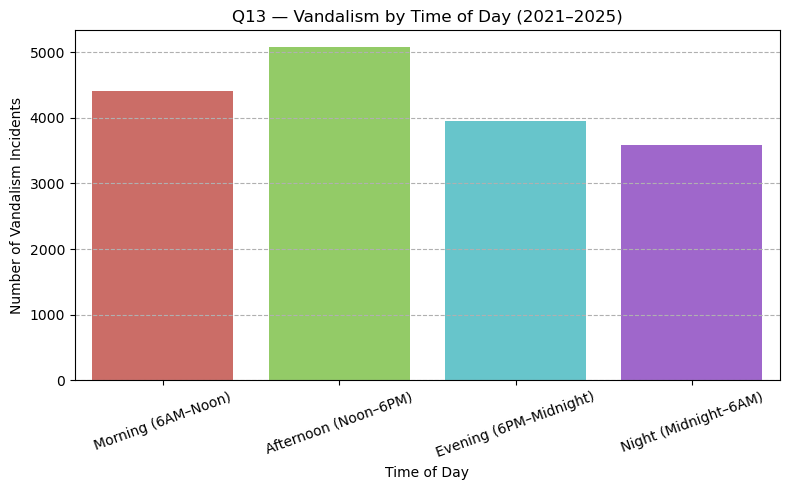

In [23]:
# Q13 — What time of the day has the most frequent vandalism?

# filter only vandalism records
q13 = crime.withColumn(
    "hour",
    F.hour(F.col("occurred_on_date"))
).filter(
    (F.col("hour").isNotNull()) &
    (F.lower(F.col("offense_description")).contains("vandalism"))
)

# CreatING hour bins for time of day
q13_binned = q13.withColumn(
    "time_of_day",
    F.when((F.col("hour") >= 6) & (F.col("hour") < 12), "Morning (6AM–Noon)")
     .when((F.col("hour") >= 12) & (F.col("hour") < 18), "Afternoon (Noon–6PM)")
     .when((F.col("hour") >= 18) & (F.col("hour") < 24), "Evening (6PM–Midnight)")
     .otherwise("Night (Midnight–6AM)")
)

# Group by time of day and count vandalisms
q13_grouped = q13_binned.groupBy("time_of_day")\
    .agg(F.count("*").alias("total_vandals"))\
    .orderBy(F.desc("total_vandals"))

pd_q13 = q13_grouped.toPandas()

order = [
    "Morning (6AM–Noon)",
    "Afternoon (Noon–6PM)",
    "Evening (6PM–Midnight)",
    "Night (Midnight–6AM)"
] #had to order manually from morning to night

pd_q13["time_of_day"] = pd.Categorical(pd_q13["time_of_day"], categories=order, ordered=True)
pd_q13 = pd_q13.sort_values("time_of_day")

plt.figure(figsize=(8, 5))
sns.barplot(x="time_of_day", y="total_vandals", data=pd_q13, palette="hls")
plt.title("Q13 — Vandalism by Time of Day (2021–2025)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Vandalism Incidents")
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

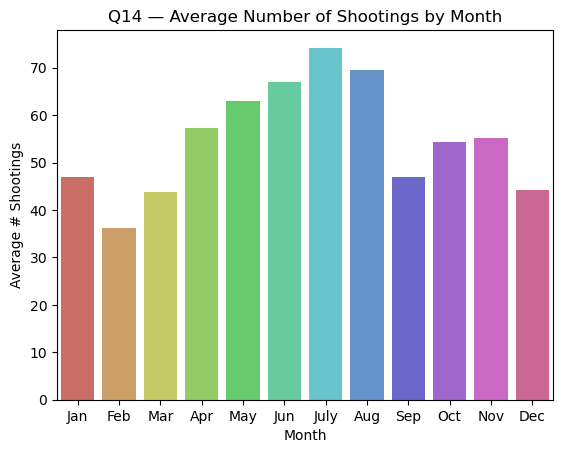

In [61]:
# Q14 — What are the average shootings per month across the years?

shoot_month = crime.filter(col("year").between(2021,2025)).groupBy("year","month") \
                   .agg(F.sum("shooting").alias("shoot_count"))
shoot_month_agg = shoot_month.groupBy("month").agg(F.avg("shoot_count").alias("avg_shoots")).orderBy("month")
sm_pd = shoot_month_agg.toPandas()
plt.figure()
sns.barplot(data=sm_pd, x='month', y='avg_shoots', palette='hls')
plt.title("Q14 — Average Number of Shootings by Month")
plt.xlabel("Month")
plt.ylabel("Average # Shootings")
plt.xticks(ticks=range(12), #changing the x labels to be the names of the months, not numbers 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [25]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

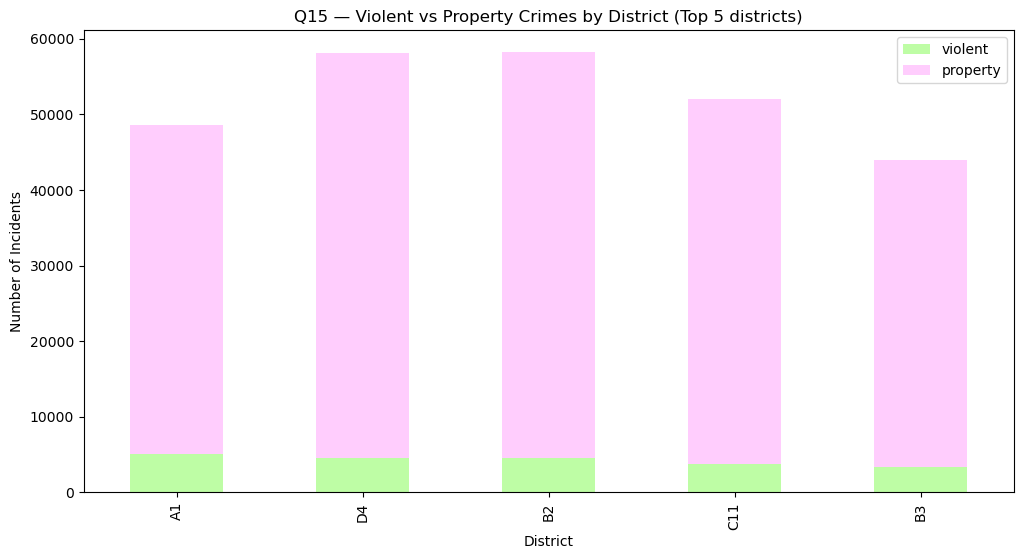

In [26]:
#Q15 — What is the ratio of property crime vs violent crime by district for the top 5 districts?

district_prop_viol = crime.filter(col("district").isNotNull()) \
    .groupBy("district").agg(
        F.sum(F.when(col("violent_flag")==1,1).otherwise(0)).alias("violent"),
        F.sum(F.when(col("violent_flag")==0,1).otherwise(0)).alias("property")
    ).orderBy(F.desc(F.col("violent")+F.col("property"))).limit(5)

dpv_pd = district_prop_viol.toPandas().set_index('district')
dpv_pd = dpv_pd.sort_values(by=['violent','property'], ascending=False)
dpv_pd.plot(kind='bar', stacked=True, figsize=(12,6), colormap='vanimo_r')
plt.title("Q15 — Violent vs Property Crimes by District (Top 5 districts)")
plt.xlabel("District")
plt.ylabel("Number of Incidents")
plt.show()


# Summary

The PySpark analysis of this Boston crime dataset provided detailed insights into the temporal, spatial, and qualitative nature of criminal incidents. Within the key trends and seasonal patterns for this dataset, the overall volume of crime (Q1) fluctuates somewhat. Analysis by Year-Month (Q2) and average crime by month (Q3, Q4) confirms a distinct summer and fall spike in criminal activity, with months like July and August recording the highest average incidents, while the winter and early spring months (especially February) show the lowest. It also reveals an increase overall year-to-year while still showing cyclical fluctuations. Q4 shows an extremely low minimum crimes for September of only 35, which I assume is because the data was not complete for September 2025 when it was submitted. Q14 drills down into shooting incidents, which are most frequent in summer as well.

The time of day analysis (Q5) reveals that crime peaks in the late afternoon and early evening (4 PM to 6 PM), a pattern which may be attributed to end-of-business hours and increased street activity. Since the observations at hour 0 were much higher, it seems to me like the null entries are mixed in with those that are actually at hour 0, which is skewing the data artificially. This peak is particularly pronounced on weekdays at noon as well as 4-5pm (Q6), suggesting a strong lunch break and end-of-workday factor in crime incidents. This information could tell police when incidents are most likely and prepare them for patrols. Q13 delves into the times of day for a more specific crime, vandalism, and though I would have assumed that it mostly takes place at night, it was actually most common in the afternoon, which was followed by the morning.

Most of the crime is concentrated in a handful of high-density areas. The top 5 districts (Q7) consistently account for the majority of incidents. In Q12, as well, we see that Washington Street has more than double the amount of crime than the second most common street. Understanding this pattern lets police focus resources on problem neighborhoods and the most common offense types there. Within these districts (Q8), the dominant offenses are often property crimes such as theft and vandalism. The percentage of total incidents involving a shooting (Q9) is relatively low. Offenses most commonly associated with shootings (Q10) are typically other violent acts, such as aggravated assault and firearm/weapon violations, confirming the high-risk nature of these specific conflicts, which is important for prevention or intervention.

The added questions (Q11–Q15) explored deeper dynamics with novel insights. Q11 shows the violent-crime trend, which has increased every year (2025 is incomplete). This information helps policymakers track violence-level changes since 2021. For Q15, the property versus violent crime ratio by district clarifies district-level crime profiles. The stacked bar visualization shows the comparison and its scale.